# LEAD SCORE CASE STUDY

In [1910]:
# Importing required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [1911]:
import warnings
warnings.filterwarnings('ignore')

In [1912]:
# Importing Dataset
lead=pd.read_csv("Leads.csv")

In [1913]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1914]:
lead.shape

(9240, 37)

In [1915]:
print(lead.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [1916]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1917]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1918]:
# Dropping the features 'Prospect ID'and 'Lead Number' which are redundant for the prediction.
lead=lead.drop(['Prospect ID','Lead Number'],axis=1)

## 1. Data Cleaning and Preparation

In [1920]:
# Converting all the values to lower case
lead = lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [1921]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead = lead.replace('select',np.nan)


In [1922]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [1923]:
# Dropping unique valued columns
lead1=lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [1924]:
# Checking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [1925]:
# Removing all the columns that have more than 30% null values
lead2 = lead1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Quality','Lead Profile','City','How did you hear about X Education','Specialization'],axis=1)
lead2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [1926]:
#checking value counts of "Country" column
lead2['Country'].value_counts(dropna=False)

Country
india                   6492
NaN                     2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [1927]:
# dropping the  feature "Country" since it doesnot provide any useful information to the analysis.
lead2.drop(['Country'], axis = 1, inplace = True)


In [1928]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free copy of Mastering The Interview            0.00
Last Notab

There is a huge value of null variables in 2 columns as seen above. But removing the rows with the null value will cost us a lot of data 
and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and 
almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [1930]:
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna('not provided')
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna('not provided')


In [1931]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity       

In [1932]:
# Checking the percent of lose if the null values are removed
round(100*(sum(lead2.isnull().sum(axis=1) > 1)/lead2.shape[0]),2)

1.48

In [1933]:
# Since the percent of loss of data if the null values are removed are very less it is better to remove those rows containing null values.
lead3 = lead2[lead2.isnull().sum(axis=1) <1]

In [1934]:
# Rechecking the percentage of missing values
round(100*(lead3.isnull().sum()/len(lead3.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                         

# 2. EDA

### 2.1 Univariate Analysis

### 2.1.1 Numerical Variables

In [1938]:
lead3.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement                             object
Through Recommendations                           object
A free copy of Mastering The In

In [1939]:
numeric_columns=lead3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [1940]:
numeric_columns.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


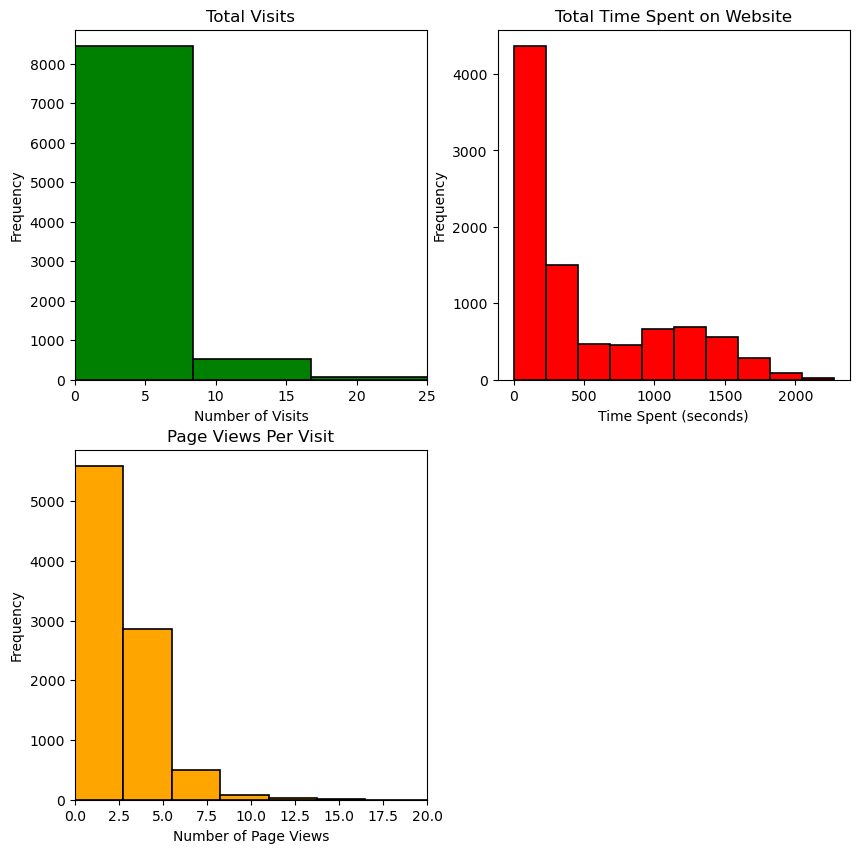

In [1941]:
# Creating histograms for numerical variables

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead3['TotalVisits'], bins = 30,color='green', edgecolor='black', linewidth=1.2)
plt.title('Total Visits')
plt.xlabel('Number of Visits')  
plt.ylabel('Frequency')  
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead3['Total Time Spent on Website'], bins = 10,color='red', edgecolor='black', linewidth=1.2)
plt.title('Total Time Spent on Website')
plt.xlabel('Time Spent (seconds)')  
plt.ylabel('Frequency')  

plt.subplot(223)
plt.hist(lead3['Page Views Per Visit'], bins = 20,color='orange', edgecolor='black', linewidth=1.2)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.xlabel('Number of Page Views')  
plt.ylabel('Frequency')    
plt.show()


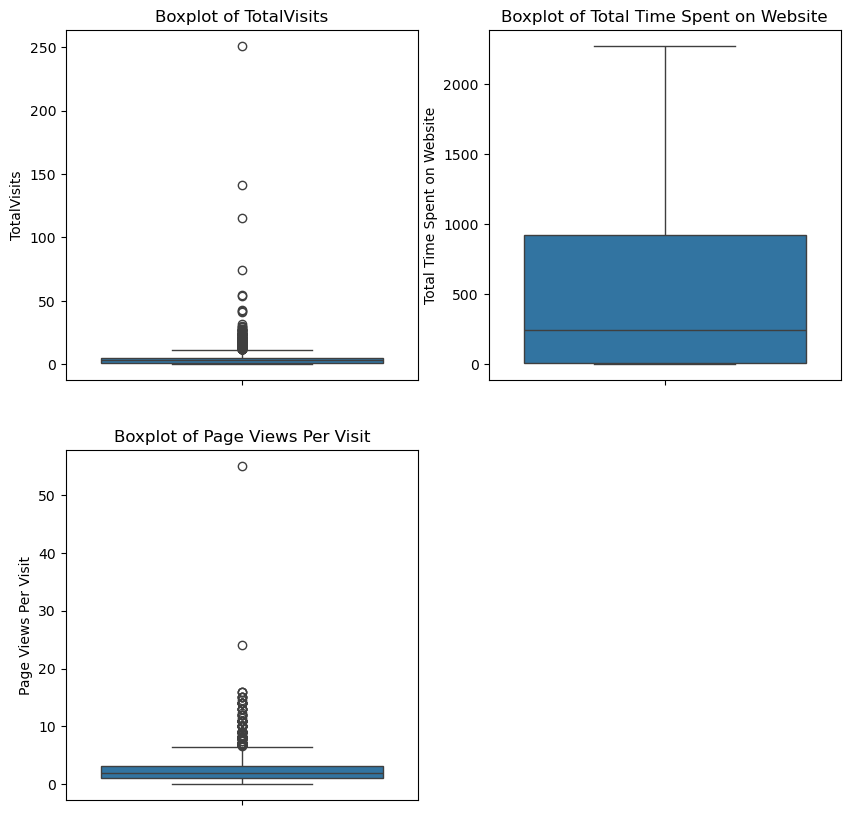

In [1942]:
# Creating boxplots for numerical variables to analyse outliers
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(lead3['TotalVisits'])
plt.title('Boxplot of TotalVisits')

plt.subplot(222)
sns.boxplot(lead3['Total Time Spent on Website'])
plt.title('Boxplot of Total Time Spent on Website')

plt.subplot(223)
sns.boxplot(lead3['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit')

plt.show()

It is observed that there are  outliers in 'TotalVisits' and 'Page Views Per Visit'.So need to treat those outliers by capping.

In [1944]:
# Apply capping for the variables 'TotalVisits' and 'Page Views Per Visit'
Q1 = lead3[['TotalVisits', 'Page Views Per Visit']].quantile(0.05)
Q3 = lead3[['TotalVisits', 'Page Views Per Visit']].quantile(0.98)
lead3[['TotalVisits', 'Page Views Per Visit']] = lead3[['TotalVisits', 'Page Views Per Visit']].clip(Q1, Q3,axis=1)

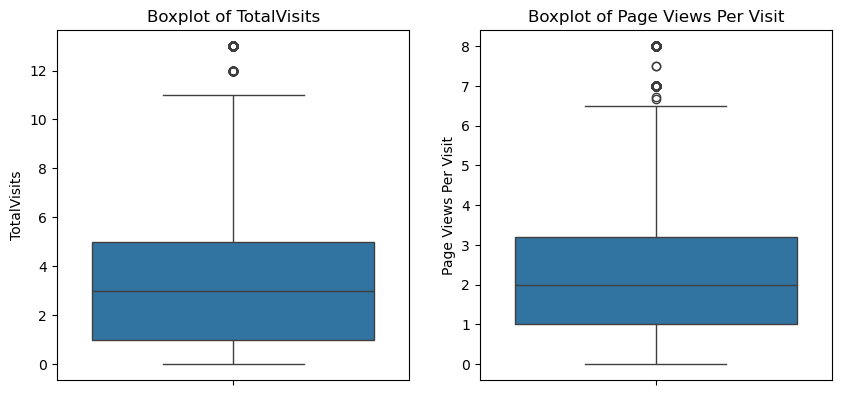

In [1945]:
# Visualizing boxplots for 'TotalVisits' and 'Page Views Per Visit' again to check outliers
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(lead3['TotalVisits'])
plt.title('Boxplot of TotalVisits')

plt.subplot(222)
sns.boxplot(lead3['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit')

plt.show()

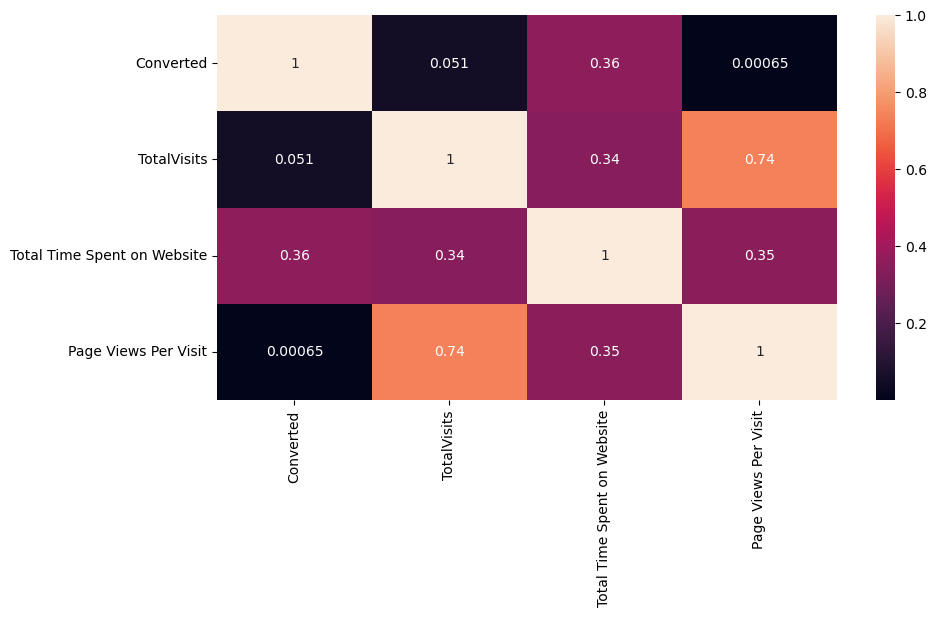

In [1946]:
# Checking the correlation among numerical variables.
plt.figure(figsize=(10,5))
sns.heatmap(lead3[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),annot=True)
plt.show()

In [1947]:
# Dropping the feature 'total visits' since it has high correlation with 'Total Time Spent on Website'
lead3.drop(['TotalVisits'],axis=1,inplace=True)

### 2.1.2 Categorical Variables

In [1949]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 non-n

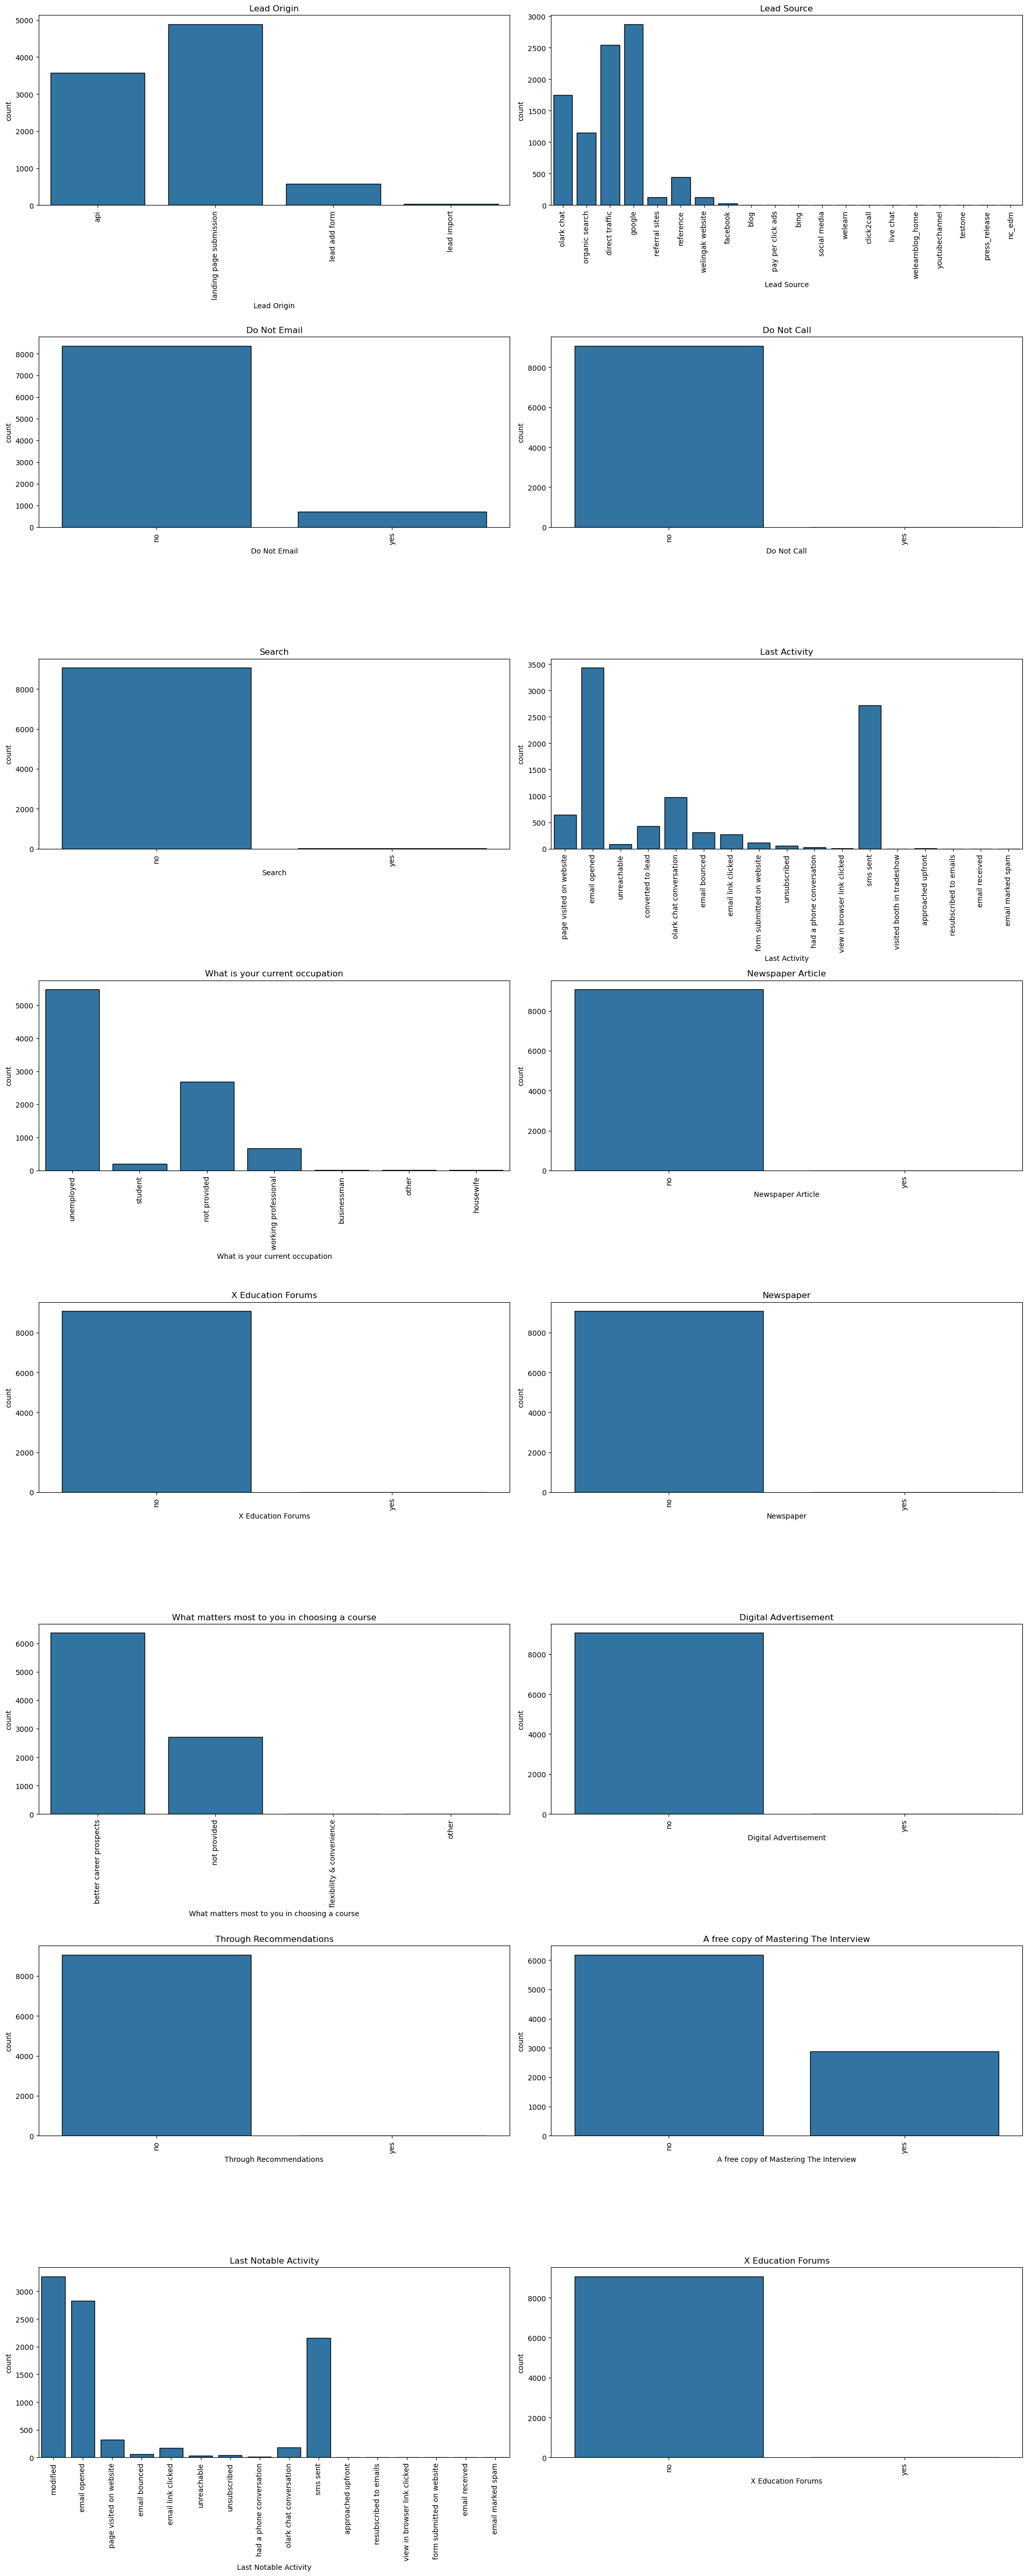

In [1950]:
# Creating countplots for the categorical variables.

# List of columns to plot
cat_columns = [
    'Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call', 'Search','Last Activity',
    'What is your current occupation','Newspaper Article', 'X Education Forums', 'Newspaper',
    'What matters most to you in choosing a course','Digital Advertisement', 'Through Recommendations',
    'A free copy of Mastering The Interview', 'Last Notable Activity',
    'X Education Forums'
         ]

plt.figure(figsize=(20, 50))  
# Loop through columns and create countplots
for i, col in enumerate(cat_columns, 1):
    plt.subplot(8, 2, i)  # Create subplot (8 rows, 2 columns)
    sns.countplot(x=lead3[col], edgecolor='black')  
    plt.title(col)  
    plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## 2.2  Bivariate Analysis

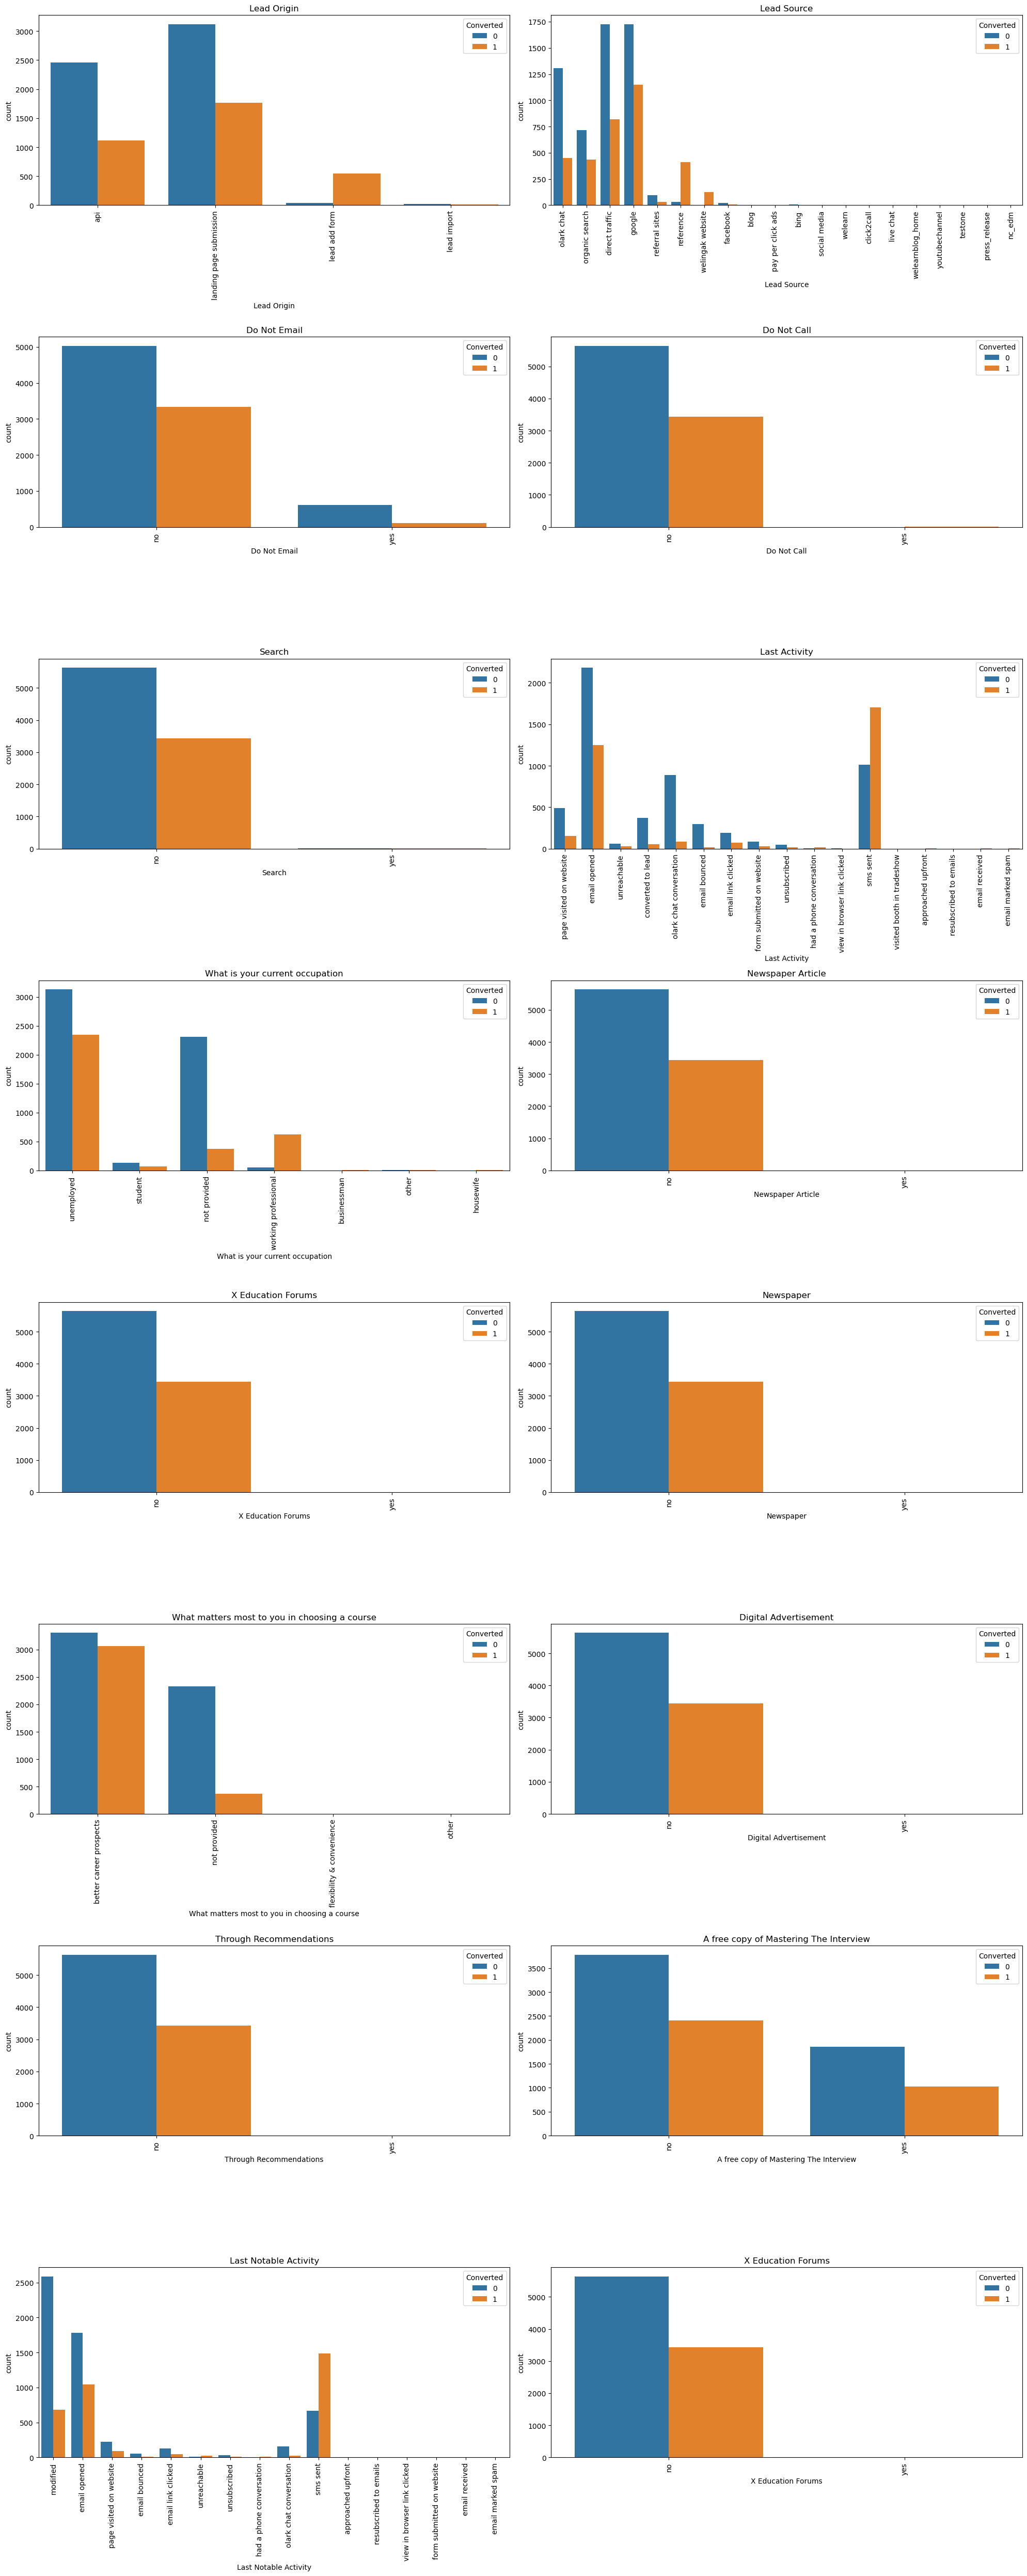

In [1952]:
# Visualizing the relation between the target variable with  other variables.

# List of columns to plot
cat_columns = [
    'Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call', 'Search','Last Activity',
    'What is your current occupation','Newspaper Article', 'X Education Forums', 'Newspaper',
    'What matters most to you in choosing a course','Digital Advertisement', 'Through Recommendations',
    'A free copy of Mastering The Interview', 'Last Notable Activity',
    'X Education Forums'
         ]

plt.figure(figsize=(20, 50))  

# Loop through columns and create countplots
for i, col in enumerate(cat_columns, 1):
    plt.subplot(8, 2, i)  # Create subplot 
    sns.countplot(x=col, hue='Converted', data= lead3).tick_params(axis='x', rotation = 90)  
    plt.title(col)  
    plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 3. Creating Dummy Variables

In [1954]:
# Get the names of all categorical columns in the lead3 DataFrame
lead3.loc[:, lead3.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1955]:
# Get the value counts of all the categorical variables

c=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for c in lead3:
    print(lead3[c].value_counts())
    print('___________________________________________________')


Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
___________________________________________________
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64
___________________________________________________
Do Not Email
no     8358
yes     716
Name: count, dtype: int64
___________________________________________________
Do Not Call
no     9072
yes       2
Name: count, dtype: i

 Dropping the features 'Do Not Call', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement' and
 'Through Recommendations' since they show very less variance in the data.

In [1957]:
lead3 = lead3.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],
                        axis=1)


In [1958]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead3[['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
                              'What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_dum = pd.concat([lead3, dummy], axis=1)
# Convert dummy variables to int type 
lead_dum[dummy.columns] = lead_dum[dummy.columns].astype(int)
lead_dum.head()


,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,0,0,0.0,page visited on website,unemployed,better career prospects,no,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,0,674,2.5,email opened,unemployed,better career prospects,no,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,1,1532,2.0,email opened,student,better career prospects,yes,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,0,305,1.0,unreachable,unemployed,better career prospects,no,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,1,1428,1.0,converted to lead,unemployed,better career prospects,no,...,0,0,1,0,0,0,0,0,0,0


In [1959]:
# Dropping the variables for which dummies are created
lead_dum = lead_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email','Last Activity','What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
lead_dum.head()

,Converted,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,305,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1960]:
lead_dum.columns

Index(['Converted', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'Do Not Email_yes', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_email marked spam', 'Last Activity_email opened',
       'Last Activity_email received',
   

In [1961]:
# Dropping certain dummy variables which are redundant in analysis
lead_dum.drop(['Last Activity_unreachable','Last Activity_unsubscribed','Last Notable Activity_unreachable','Last Notable Activity_unsubscribed','What matters most to you in choosing a course_not provided'],axis=1,inplace=True)



# 4. Model Building

## 4.1  Train Test split

In [1964]:
np.random.seed(0)

# Define Features (X) and Target (y)
y = lead_dum['Converted']  # Target variable
X = lead_dum.drop(columns=['Converted'])  # Features

#  train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6351, 60) (2723, 60) (6351,) (2723,)


In [1965]:
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_view in browser link clicked
3009,397,2.0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1012,190,2.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,1380,2.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,1584,2.5,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


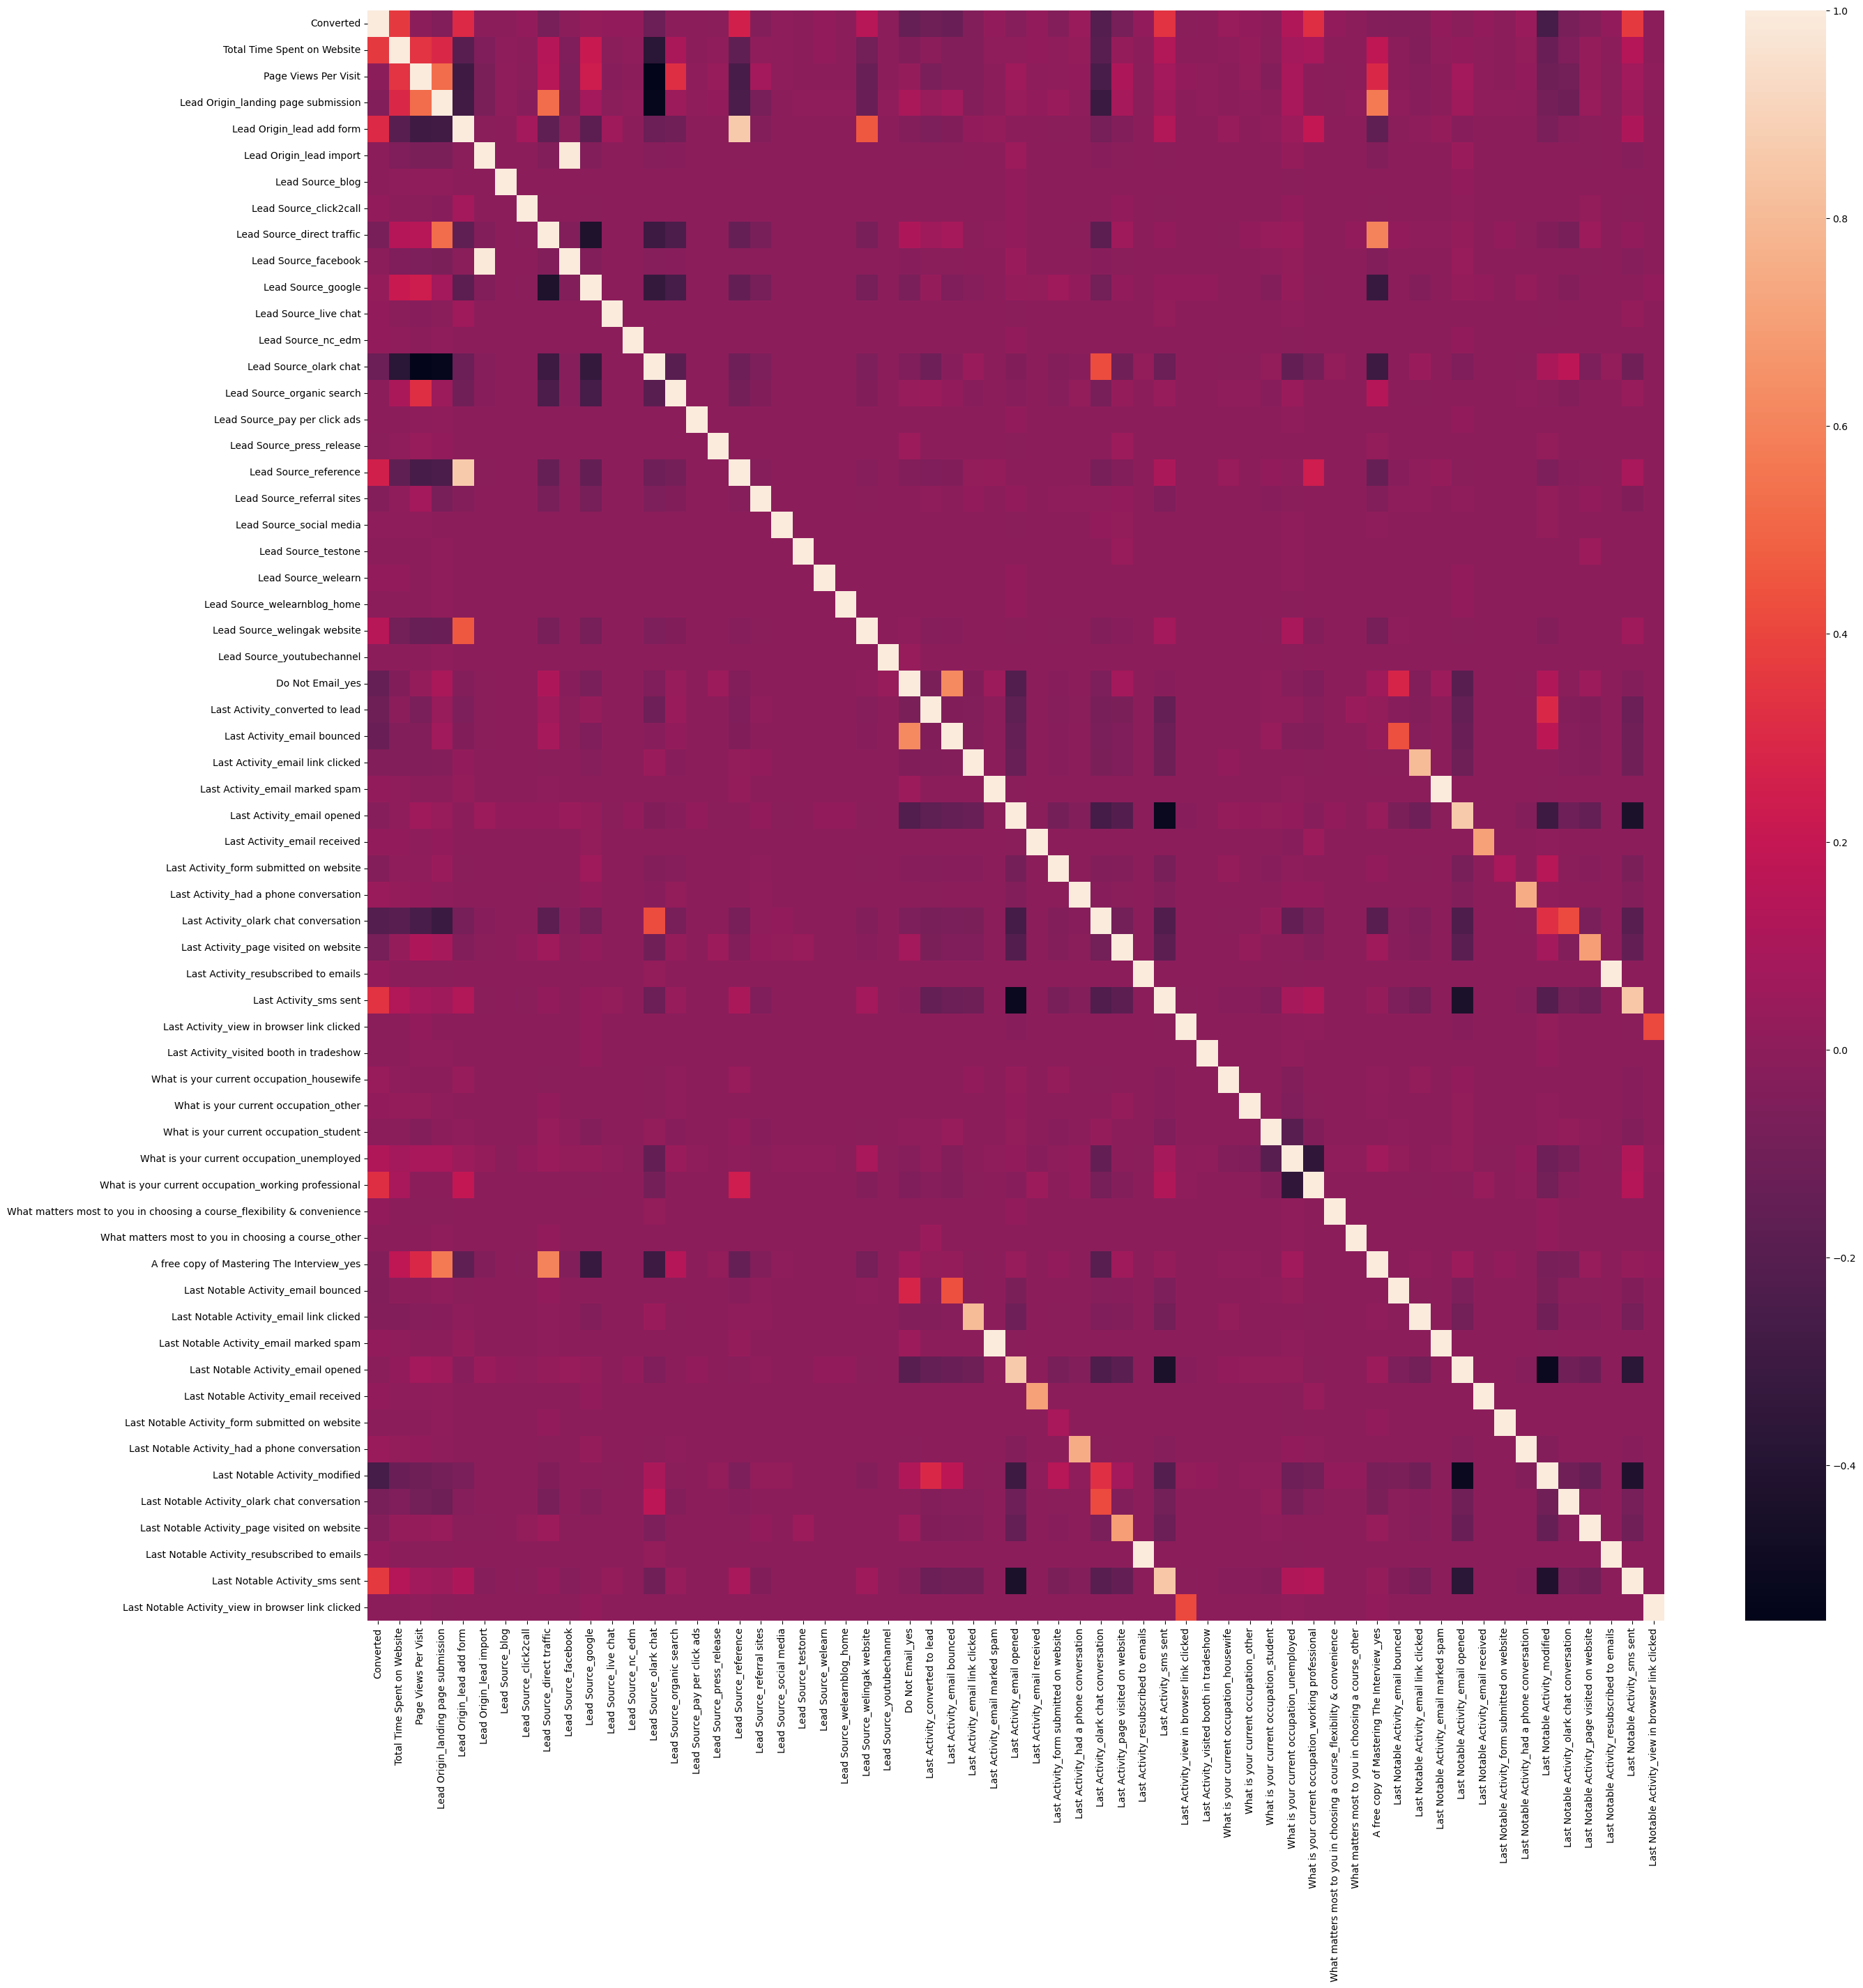

In [1966]:
# Looking at Correlations of dummy variables
plt.figure(figsize = (30,30))        
sns.heatmap(lead_dum.corr())
plt.show()

In [1967]:
# Dropping highly correlated dummy variables
X_test = X_test.drop(['Last Notable Activity_email marked spam','Last Notable Activity_resubscribed to emails','Lead Source_facebook'], axis=1)
X_train = X_train.drop(['Last Notable Activity_email marked spam','Last Notable Activity_resubscribed to emails','Lead Source_facebook'], axis=1)

## 4.2 Rescaling Features

In [1969]:
# Creating an instance of MinMaxScaler
scaler = MinMaxScaler()

In [1970]:
# Scaling numeric features
X_train[['Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_google,Lead Source_live chat,...,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_view in browser link clicked
3009,0.178347,0.2500,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,0.085355,0.2500,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4750,0.619946,0.2500,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0.711590,0.3125,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## 4.3 Selecting features through RFE

In [1972]:
# Running RFE to eliminate the insignificant variables 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rfe=RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [1973]:
# Listing the RFE selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_landing page submission', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 21),
 ('Lead Source_blog', False, 29),
 ('Lead Source_click2call', False, 24),
 ('Lead Source_direct traffic', False, 2),
 ('Lead Source_google', False, 4),
 ('Lead Source_live chat', False, 31),
 ('Lead Source_nc_edm', False, 19),
 ('Lead Source_olark chat', False, 18),
 ('Lead Source_organic search', False, 3),
 ('Lead Source_pay per click ads', False, 28),
 ('Lead Source_press_release', False, 37),
 ('Lead Source_reference', False, 11),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 22),
 ('Lead Source_testone', False, 27),
 ('Lead Source_welearn', False, 42),
 ('Lead Source_welearnblog_home', False, 30),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', False, 33),
 ('Do Not Email_yes', True, 1),
 ('Last Activity_conv

In [1974]:
# Assigning the selected feature columns to 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_email bounced',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [1975]:
# Selecting columns selected by RFE
X_train = X_train[col]

## 4.4 Fitting model with RFE selected features 

In [1977]:
# Creating a model with RFE selected variables
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.0
Date:                Fri, 21 Mar 2025   Deviance:                       5436.0
Time:                        13:23:14   Pearson chi2:                 6.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4181      0.073     -5.719      0.000      -0.561      -0.275
Total Time Spent on Website                              3.7980      0.142     26.658      0.000       3.519       4.077
Lead Origin_lead add form                                3.5410      0.218     16.231      0.000       3.113       3.969
Lead Source_referral sites                              -0.4538      0.322     -1.409      0.159      -1.085       0.178
Lead Source_welingak website                             2.0762      0.755      2.749      0.006       0.596       3.557
Do Not Email_yes                                        -1.5856      0.195     -8.121      0.000      -1.968      -1.203
Last Activity_email bounced                             -1.1671      0.422     -2.768      0.006      -1.993      -0.341
Last Activity_had a phone conversation                   1.7966      0.774      2.321      0.020       0.280       3.313
Last Activity_olark chat conversation                   -0.7060      0.186     -3.799      0.000      -1.070      -0.342
What is your current occupation_housewife               22.5581   1.62e+04      0.001      0.999   -3.16e+04    3.17e+04
What is your current occupation_working professional     2.6552      0.185     14.355      0.000       2.293       3.018
Last Notable Activity_email link clicked                -1.7291      0.257     -6.733      0.000      -2.232      -1.226
Last Notable Activity_email opened                      -1.3701      0.086    -15.859      0.000      -1.539      -1.201
Last Notable Activity_modified                          -1.9004      0.095    -20.069      0.000      -2.086      -1.715
Last Notable Activity_olark chat conversation           -1.5783      0.363     -4.347      0.000      -2.290      -0.867
Last Notable Activity_page visited on website           -1.7069      0.195     -8.754      0.000      -2.089      -1.325
========================================================================================================================
"""

## Checking VIF

In [1979]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.13
13,Last Notable Activity_modified,1.82
5,Do Not Email_yes,1.70
6,Last Activity_email bounced,1.69
12,Last Notable Activity_email opened,1.59
8,Last Activity_olark chat conversation,1.52
2,Lead Origin_lead add form,1.46
14,Last Notable Activity_olark chat conversation,1.34
4,Lead Source_welingak website,1.31
1,Total Time Spent on Website,1.13


In [1980]:
# Dropping the feature 'What is your current occupation_housewife' since it has high p value
X_train_new = X_train.drop(['What is your current occupation_housewife'], axis=1)

###  Rebuilding the model with the new set of features

In [1982]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.2
Date:                Fri, 21 Mar 2025   Deviance:                       5444.4
Time:                        13:23:14   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4188      0.073     -5.728      0.000      -0.562      -0.275
Total Time Spent on Website                              3.7999      0.142     26.693      0.000       3.521       4.079
Lead Origin_lead add form                                3.5631      0.218     16.356      0.000       3.136       3.990
Lead Source_referral sites                              -0.4559      0.322     -1.416      0.157      -1.087       0.175
Lead Source_welingak website                             2.0528      0.755      2.718      0.007       0.572       3.533
Do Not Email_yes                                        -1.5866      0.195     -8.122      0.000      -1.969      -1.204
Last Activity_email bounced                             -1.1659      0.422     -2.765      0.006      -1.992      -0.340
Last Activity_had a phone conversation                   1.7968      0.774      2.322      0.020       0.280       3.314
Last Activity_olark chat conversation                   -0.7060      0.186     -3.799      0.000      -1.070      -0.342
What is your current occupation_working professional     2.6518      0.185     14.334      0.000       2.289       3.014
Last Notable Activity_email link clicked                -1.7177      0.255     -6.729      0.000      -2.218      -1.217
Last Notable Activity_email opened                      -1.3634      0.086    -15.794      0.000      -1.533      -1.194
Last Notable Activity_modified                          -1.9001      0.095    -20.064      0.000      -2.086      -1.714
Last Notable Activity_olark chat conversation           -1.5782      0.363     -4.346      0.000      -2.290      -0.866
Last Notable Activity_page visited on website           -1.7067      0.195     -8.753      0.000      -2.089      -1.325
========================================================================================================================
"""

In [1983]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_yes,1.78
5,Last Activity_email bounced,1.75
11,Last Notable Activity_modified,1.69
7,Last Activity_olark chat conversation,1.67
0,Total Time Spent on Website,1.47
1,Lead Origin_lead add form,1.47
3,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.32
10,Last Notable Activity_email opened,1.22
8,What is your current occupation_working profes...,1.17


In [1984]:
# Dropping the feature 'Lead Source_referral sites' since it has high p value
X_train_new = X_train_new.drop(['Lead Source_referral sites'], axis=1)

## Rebuilding the model with the new set of features

In [1985]:
X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.2
Date:                Fri, 21 Mar 2025   Deviance:                       5446.5
Time:                        13:23:14   Pearson chi2:                 6.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4217      0.073     -5.770      0.000      -0.565      -0.278
Total Time Spent on Website                              3.7996      0.142     26.695      0.000       3.521       4.079
Lead Origin_lead add form                                3.5689      0.218     16.383      0.000       3.142       3.996
Lead Source_welingak website                             2.0524      0.755      2.717      0.007       0.572       3.533
Do Not Email_yes                                        -1.5865      0.195     -8.116      0.000      -1.970      -1.203
Last Activity_email bounced                             -1.1618      0.422     -2.755      0.006      -1.988      -0.335
Last Activity_had a phone conversation                   1.7710      0.777      2.278      0.023       0.248       3.294
Last Activity_olark chat conversation                   -0.7143      0.186     -3.840      0.000      -1.079      -0.350
What is your current occupation_working professional     2.6483      0.185     14.315      0.000       2.286       3.011
Last Notable Activity_email link clicked                -1.7227      0.255     -6.756      0.000      -2.222      -1.223
Last Notable Activity_email opened                      -1.3652      0.086    -15.819      0.000      -1.534      -1.196
Last Notable Activity_modified                          -1.9044      0.095    -20.123      0.000      -2.090      -1.719
Last Notable Activity_olark chat conversation           -1.5669      0.363     -4.314      0.000      -2.279      -0.855
Last Notable Activity_page visited on website           -1.7162      0.195     -8.800      0.000      -2.098      -1.334
========================================================================================================================
"""

Since all the VIF values are good and the p values are less than 0.05 the final model logm3 can be fixed.

# 5. Prediction

In [1988]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.248009
1012    0.450796
9226    0.088984
4750    0.873669
7987    0.593305
1281    0.778658
2880    0.144294
4971    0.898090
7536    0.830527
1248    0.557036
dtype: float64

In [1989]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24800937, 0.45079599, 0.08898443, 0.87366939, 0.59330457,
       0.77865823, 0.14429424, 0.89809004, 0.83052658, 0.55703624])

In [1990]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.248009
1,0,0.450796
2,0,0.088984
3,1,0.873669
4,1,0.593305


In [1991]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.248009,0
1,0,0.450796,0
2,0,0.088984,0
3,1,0.873669,1
4,1,0.593305,1


# 6.Model Evaluation

In [1993]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3419  486]
 [ 838 1608]]


In [1994]:
# Predicted     not_churn    churn
# Actual
# not_churn        3419      486
# churn            838       1608  

In [1995]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7915288930877027


That's around 80% accuracy which is a very good value

## 6.1 Metrics beyond simply accuracy


In [1998]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1999]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6573998364677024

In [2000]:
# Let us calculate specificity
TN / float(TN+FP)

0.8755441741357234

With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 65% and specificity of around 87%.

## 6.2. Plotting the ROC Curve


In [2003]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

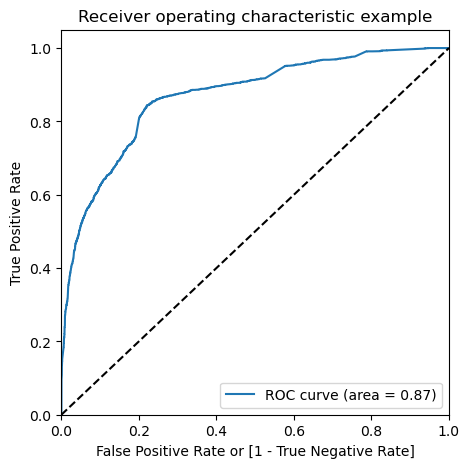

In [2004]:
# Determine the optimal threshold and plot the ROC curve  
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## 6.3. Finding Optimal Cutoff Point

In [2006]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.248009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.450796,0,1,1,1,1,1,0,0,0,0,0
2,0,0.088984,0,1,0,0,0,0,0,0,0,0,0
3,1,0.873669,1,1,1,1,1,1,1,1,1,1,0
4,1,0.593305,1,1,1,1,1,1,1,0,0,0,0


In [2007]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.548732  0.970973  0.284251
0.2   0.2  0.745867  0.885936  0.658131
0.3   0.3  0.800346  0.849141  0.769782
0.4   0.4  0.788537  0.753884  0.810243
0.5   0.5  0.791529  0.657400  0.875544
0.6   0.6  0.790269  0.573181  0.926248
0.7   0.7  0.779877  0.501226  0.954417
0.8   0.8  0.755786  0.408013  0.973624
0.9   0.9  0.708865  0.258790  0.990781


Here 0.4 seems like the best balanced choice as it gives a good trade-off between Sensitivity and Specificity.

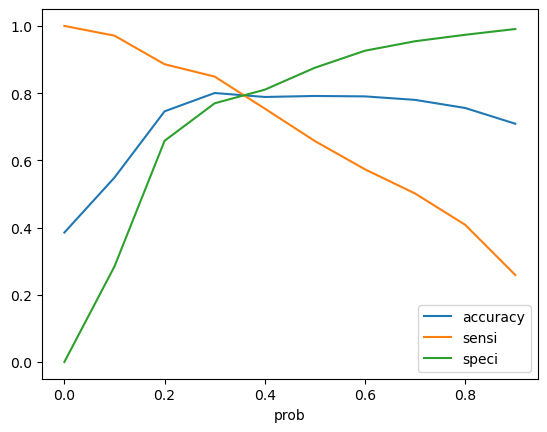

In [2009]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.39 is the optimum point to take it as a cutoff probability.

In [2011]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.248009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.450796,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.088984,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.873669,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.593305,1,1,1,1,1,1,1,0,0,0,0,1


In [2012]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8036529680365296

In [2013]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3120,  785],
       [ 462, 1984]])

In [2014]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2015]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8111201962387572

In [2016]:
# Let us calculate specificity
TN / float(TN+FP)

0.7989756722151088

In [2017]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7165041531238714


In [2018]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8710217755443886


With the current cut off as 0.39 we have around 80% accuracy, sensitivity of around 81% and specificity of around 80%.



## 6.4 Precision and Recall

In [2021]:
#Looking at the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3120,  785],
       [ 462, 1984]])

Precision
TP / TP + FP

In [2023]:
# Calculate precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7165041531238714

Recall
TP / TP + FN

In [2025]:
# Calculate recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8111201962387572

With the current cut off as 0.39 we have Precision around 72% and Recall around 81%

## 6.5. Precision and recall tradeoff

In [2028]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

In [2029]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

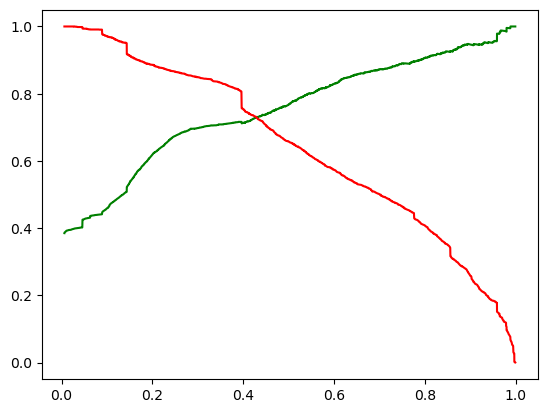

In [2030]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [2031]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.248009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.450796,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.088984,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.873669,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.593305,1,1,1,1,1,1,1,0,0,0,0,1


In [2032]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7885372382301999

In [2033]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3189,  716],
       [ 627, 1819]])

In [2034]:
# Substituting the value of true positive
TP = confusion3[1,1]
# Substituting the value of true negatives
TN = confusion3[0,0]
# Substituting the value of false positives
FP = confusion3[0,1] 
# Substituting the value of false negatives
FN = confusion3[1,0]

In [2035]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7175542406311637

In [2036]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7436631234668847

With the current cut off as 0.41 we have Precision around 71% and Recall around 74%

Since our goal is to capture as many potential customers as possible i.e, capture more converting leads we need to go for the cut off 
giving higher sensitivity or recall.Therefore better cut off will be 0.39 for which the recall is higher in this case.

# 7. Making predictions on the test set

In [2040]:
# Rescaling features
X_test[[ 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['Page Views Per Visit', 'Total Time Spent on Website']])


In [2041]:
# Substituting all the columns in the final train model
col = X_train_new.columns

In [2042]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [2043]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test\\
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()


,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_email bounced,Last Activity_had a phone conversation,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.0,0.070530,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,0,1,0,0,0


In [2044]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_test_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,0,0.179621
1,1,0.969052
2,0,0.159683
3,1,0.776050
4,0,0.181389


In [2045]:
# Substituting 0 or 1 with the cut off as 0.39
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.179621,0
1,1,0.969052,1
2,0,0.159683,0
3,1,0.776050,1
4,0,0.181389,0


In [2046]:
# Assign a lead score between 0 and 100 to each of the leads 
y_test_pred_final["Lead_Score"] = y_test_pred_final.Conversion_Prob * 100
y_test_pred_final = y_test_pred_final.sort_values(by="Lead_Score", ascending=False) # arrange in the decreasing order of lead score
y_test_pred_final.head(10)  


,Converted,Conversion_Prob,Predicted,Lead_Score
1422,1,0.997605,1,99.760499
23,1,0.996968,1,99.696803
1055,1,0.996968,1,99.696803
25,1,0.996968,1,99.696803
215,1,0.996968,1,99.696803
1174,1,0.996968,1,99.696803
2310,1,0.996968,1,99.696803
2634,1,0.996968,1,99.696803
1439,1,0.996968,1,99.696803
1239,1,0.996968,1,99.696803


In [2047]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.7947117150201983

In [2048]:
confusion4 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion4

array([[1379,  355],
       [ 204,  785]])

In [2049]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [2050]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7937310414560161

In [2051]:
# Let us calculate specificity
TN / float(TN+FP)

0.7952710495963091

In [2052]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6885964912280702

In [2053]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7937310414560161

With the current cut off 0.39 we have Accuracy around 80% , Precision around 68% and Recall around 79% for the test set which doesnot 
differ much from the train set.Hence this is a decent model for predicting the lead conversion rate.

##  Conclusion